# Non-Linear Modeling in Python

In this lab, we demonstrate some of the nonlinear models discussed in chapter 7 of ISLP. We use [the Wage data](https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Wage.csv) as a running example, and show that
many of the complex non-linear ftting procedures discussed can easily be implemented in `Python`.

As usual, we start with some of our standard imports.

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm

Here we import the libraries necessary for Polynomial Regression, Step Functions, Spline, and Generalized Additive Models (GAM) in Python using popular libraries such as `scikit-learn`, `patsy`, and `pygam`.

In [12]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrix
from pygam import (s as s_gam, l as l_gam, f as f_gam, LinearGAM, LogisticGAM, te)

## Load Wage Data

In [9]:
wage=pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Wage.csv")
wage.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


To construct the polynomial, we use the [power function](https://numpy.org/doc/stable/reference/generated/numpy.power.html) in the `numpy` library. With polynomial regression we must decide on the degree of the polynomial to use. Sometimes we just wing it, and decide to use second or third 
degree polynomials, simply to obtain a nonlinear ift.mplex model. 118.

In [138]:
# Extract the age predictor variable and target variable
X = wage[['age']]
y = wage['wage']

# Fit degree 2 polynomial regression model
X_poly_degree2 = sm.add_constant(X**2)
model_degree2 = sm.OLS(y, X_poly_degree2).fit()

In [101]:
# Fit degree 3 polynomial regression model
X_poly_degree3 = sm.add_constant(X**3)
model_degree3 = sm.OLS(y, X_poly_degree3).fit()

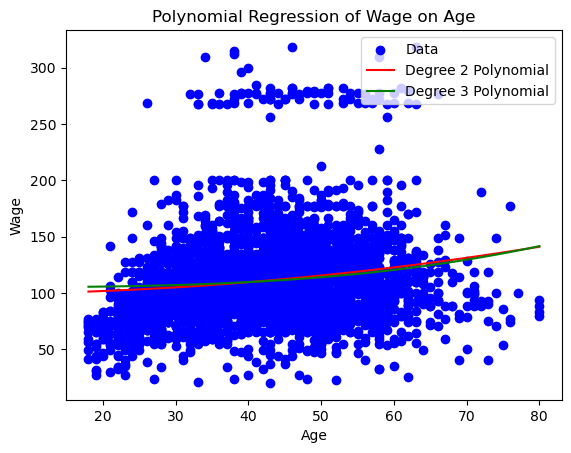

In [102]:
# Plot the data points
plt.scatter(X, y, color='blue', label='Data')

# Plot degree 2 polynomial regression curve
X_plot = np.linspace(X.min(), X.max(), 100)
X_plot_poly_degree2 = sm.add_constant(X_plot**2)
plt.plot(X_plot, model_degree2.predict(X_plot_poly_degree2), color='red', label='Degree 2 Polynomial')

# Plot degree 3 polynomial regression curve
X_plot_poly_degree3 = sm.add_constant(X_plot**3)
plt.plot(X_plot, model_degree3.predict(X_plot_poly_degree3), color='green', label='Degree 3 Polynomial')

plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Polynomial Regression of Wage on Age')
plt.legend()
plt.show()

But we can make such a decision in a more systematic way. One way to do this is through hypothesis tests, which we demonstrate here. We now ft a series of models ranging from linear (degree-one) to degree-eight polynomials, and look to determine the simplest model that is sufficient to explain the relationship between `wage` and `age`. We use the `anova_lm()` function, which performs a series of ANOVA tests. An analysis of variance or ANOVA tests the null hypothesis that a model $M_1$ is sufficient to explain the data against the alternative hypothesis that a more complex model $M_2$ is required. The determination is based on an *F*-test. To perform the test, the models $M_1$ and $M_2$ must be *nested*: the space spanned by the predictors in $M_1$ must be a subspace of the space spanned by the predictors in $M_2$. In this case, we fit eight different polynomial models and sequentially compare the simpler model to the more complex model.

In [99]:
# Define the degrees of polynomial features
degrees = np.arange(1,9)

# Initialize an empty list to store ANOVA results
anova_results = []

# Iterate over each degree
for i in degrees:
    # Fit the polynomial regression model
    model = ols(f'wage ~ np.power(age, {i})', data=wage).fit()
    
    # Perform ANOVA to compare with previous model
    anova_result = sm.stats.anova_lm(model)
    
    # Store the F-statistic and p-value
    f_statistic = anova_result['F'].iloc[0]
    p_value = anova_result['PR(>F)'].iloc[0]
    
    # Store the degree, F-statistic, and p-value in a tuple
    anova_results.append((i, f_statistic, p_value))

# Convert results to DataFrame for easier analysis
anova_df = pd.DataFrame(anova_results, columns=['Degree', 'F-Statistic', 'P-Value'])

# Print the ANOVA results
anova_df

,Degree,F-Statistic,P-Value
0,1,119.311723,2.900778e-27
1,2,77.714956,1.977988e-18
2,3,46.359385,1.184380e-11
3,4,25.114326,5.716551e-07
4,5,12.026166,5.319744e-04
5,6,4.772833,2.898941e-02
6,7,1.316732,2.512710e-01
7,8,0.109109,7.411844e-01


The p-value comparing the linear `models[0]` to the quadratic `models[1]` 
is essentially zero, indicating that a linear ift is not sufifcient Indexing starting at zero is confusing for the polynomial degree example, since`
models[1`] is quadratic rather than linear ! Similarly t *e*
p-value comparing tquintict`ic mode4s`[1] to tquarticb`ic mode3s`[2] is v ry
l0.00053197440017), so the quinticatiic ft is also insufcient. *T*he p-value compa the septic and sextic polynomials, `models[6]`, is approximately 25%, while the degree-eight polynomial `models[7]` seems unnecessary 
becaue iits* *p-valu iss 0347. ence,  asepticc ordegree-sevenc polyomial nomial
appear to provide a reasionable ft to the data, but lower- or high r-order
models are not justifed.

## Step Function

In order to fit a step function, we first use the [`pd.qcut()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) function to discretize `age` based on quantiles. Then we use `pd.get_dummies()` to create the columns of the model matrix for this categorical variable. Note that this function will include all columns for a given categorical, rather than the usual approach which drops one of the levels

In [106]:
cut_age = pd.qcut(age, 4)
sm.OLS(y, pd.get_dummies(cut_age)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     63.30
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.12e-39
Time:                        22:47:03   Log-Likelihood:                -15358.
No. Observations:                3000   AIC:                         3.072e+04
Df Residuals:                    2996   BIC:                         3.075e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
(17.999, 33.75]    94.1584      1.478     63.692      0.000      91.260      97.057
(33.75, 42.0]     116.6608      1.470     79.385      0.000     113.779     119.542
(42.0, 51.0]      119.1887      1.416     84.147      0.000     116.411     121.966
(51.0, 80.0]      116.5717      1.559     74.751      0.000     113.514     119.629
==============================================================================
Omnibus:                     1062.319   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4546.061
Skew:                           1.681   Prob(JB):                         0.00
Kurtosis:                       8.006   Cond. No.                         1.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here `pd.qcut()` automatically picked the cutpoints based on the quantiles 25%, 50% and 75%, which results in four regions. We could also have 
specifed our own quantiles directly instead of the argument` `4. For cuts
not based on quantiles we would use th`e pd.cut`() function. The functio`) pd.qcut`() (an`d pd.cut`()) returns an ordered categorical variable. The regression model then creates a set of dummy variables for use in the regression. Since age is the only variable in the model, the value $94,158.40 is t e
average salary for those under 33.75 years of age, and the other coefcie ts
are the average salary for those in the other age gr.oups

## Splines

In [135]:
# Define the knots for the basis spline
knots = np.linspace(X.min(), X.max(), 8).flatten()   # Use 8 knots for degree 3

# Fit a basis spline model
basis_spline_model = BSpline(knots, np.zeros(len(knots)), 3)

# Get the basis spline features
X_basis = basis_spline_model(X)

# Fit linear regression model using the basis spline features
model = sm.OLS(y, X_basis).fit()

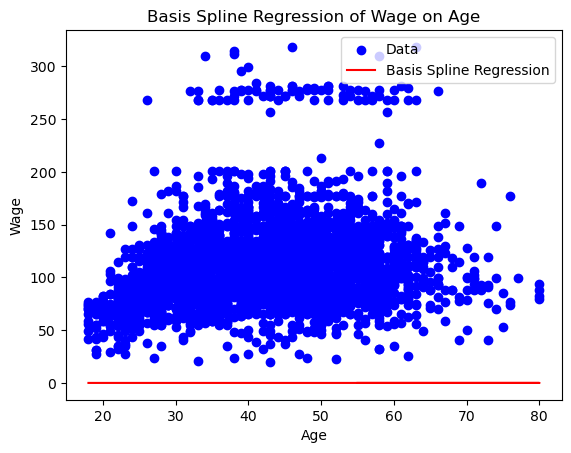

In [137]:
# Sort the dataset by 'age' for smoother plotting
wage.sort_values(by='age', inplace=True)

X_plot = np.linspace(X.min(), X.max(), 3000)

# Predict wages using the fitted model
y_pred = model.predict(X_plot)

# Plot the data points
plt.scatter(X, y, color='blue', label='Data')

# Plot the predicted values
plt.plot(X, y_pred, color='red', label='Basis Spline Regression')

plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Basis Spline Regression of Wage on Age')
plt.legend()
plt.show()

In [ ]:
# Plot the data points
plt.scatter(X, y, color='blue', label='Data')

# Plot the basis spline curve
X_plot = np.linspace(X.min(), X.max(), 1000)
plt.plot(X_plot, basis_spline_model(X_plot), color='red', label='Basis Spline')

plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Basis Spline Model of Wage on Age')
plt.legend()
plt.show()